In [ ]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
%cd drive/MyDrive/TechLabs/02_Data\ Manipulation/Part\ C\ -\ Pandas

[Errno 2] No such file or directory: 'drive/MyDrive/TechLabs/02_Data Manipulation/Part C - Pandas'
/content/drive/MyDrive/TechLabs/02_Data Manipulation/Part C - Pandas


In [ ]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np

In [ ]:
# These commands load the data from googlecolab
bycountry = pd.read_csv("data/sdg_11_60_page_linear.csv")

In [ ]:
bycountry


,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AL,2020,18.1,NaN
1,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AL,2021,18.7,NaN
2,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AT,2000,63.4,NaN
3,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AT,2001,64.3,e
4,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AT,2002,62.5,e
...,...,...,...,...,...,...,...,...
712,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,UK,2016,44.0,NaN
713,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,UK,2017,43.8,NaN
714,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,UK,2018,44.1,NaN
715,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,XK,2020,0.0,NaN


In [ ]:
#delete irrelevant columns for data analysis
bycountry.drop("DATAFLOW", inplace=True, axis=1)
bycountry.drop("LAST UPDATE", inplace=True, axis=1)
bycountry.drop("freq", inplace=True, axis=1)
bycountry.drop("unit", inplace=True, axis=1)
bycountry

,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,AL,2020,18.1,NaN
1,AL,2021,18.7,NaN
2,AT,2000,63.4,NaN
3,AT,2001,64.3,e
4,AT,2002,62.5,e
...,...,...,...,...
712,UK,2016,44.0,NaN
713,UK,2017,43.8,NaN
714,UK,2018,44.1,NaN
715,XK,2020,0.0,NaN


In [ ]:
#delete one additional column for data analysis as no impact on data
bycountry.drop("OBS_FLAG", inplace=True, axis=1)
bycountry.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AL,2020,18.1
1,AL,2021,18.7
2,AT,2000,63.4
3,AT,2001,64.3
4,AT,2002,62.5


In [ ]:
bycountry.rename(columns={"geo": "region_id", "TIME_PERIOD":"year", "OBS_VALUE":"recycling_rate_municipal_waste_percent"}, inplace=True)
bycountry.head()

,region_id,year,recycling_rate_municipal_waste_percent
0,AL,2020,18.1
1,AL,2021,18.7
2,AT,2000,63.4
3,AT,2001,64.3
4,AT,2002,62.5


In [ ]:
#add a new column and assign the country name to it
bycountry["country_name"]=bycountry.region_id.replace({"EU27_2020": "European Union - 27 countries (from 2020)","EU28": "European Union - 28 countries (2013-2020)",
"BE": "Belgium",
"BG": "Bulgaria",
"CZ": "Czechia",
"DK": "Denmark",
"DE": "Germany",
"EE": "Estonia",
"IE": "Ireland",
"EL": "Greece",
"ES": "Spain",
"FR": "France",
"HR": "Croatia",
"CY": "Cyprus",
"IT": "Italy",
"LV": "Latvia",
"LT": "Lithuania",
"LU": "Luxembourg",
"HU": "Hungary",
"MT": "Malta",
"NL": "Netherlands",
"AT": "Austria",
"PL": "Poland",
"PT": "Portugal",
"RO": "Romania",
"SI": "Slovenia",
"SK": "Slovakia",
"FI": "Finland",
"SE": "Sweden",
"IS": "Iceland",
"NO": "Norway",
"CH": "Switzerland",
"UK": "United Kingdom",
"BA": "Bosnia and Herzegovina",
"ME": "Montenegro",
"MK": "North Macedonia",
"AL": "Albania",
"RS": "Serbia",
"TR": "Türkiye",
"XK": "Kosovo"
})

In [ ]:
#compare the number assigend values in "country_name" with "region_id" (ok)
bycountry["country_name"].nunique()

39

In [ ]:
#number assigend values in "region_id" (ok)
bycountry["region_id"].nunique()

39

In [ ]:
#move column "country_name"
column_to_move = bycountry.pop("country_name")
bycountry.insert(0, "country_name", column_to_move)
bycountry.head(5)

,country_name,region_id,year,recycling_rate_municipal_waste_percent
0,Albania,AL,2020,18.1
1,Albania,AL,2021,18.7
2,Austria,AT,2000,63.4
3,Austria,AT,2001,64.3
4,Austria,AT,2002,62.5


In [ ]:
#see all NAN values which will be filled with mean values later
bycountryoriginal = np.round(pd.pivot_table(bycountry, values="recycling_rate_municipal_waste_percent", index=["country_name", "region_id"], columns="year", aggfunc=np.mean),2)
bycountryoriginal

,year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country_name,region_id,,,,,,,,,,,,,,,,,,,,,
Albania,AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.1,18.7
Austria,AT,63.4,64.3,62.5,64.2,57.4,58.3,59.2,60.2,63.2,61.9,...,57.7,57.7,56.3,56.9,57.6,57.8,57.7,58.2,62.3,NaN
Belgium,BE,49.7,50.4,51.5,52.9,53.5,55.6,56.1,56.8,52.7,53.9,...,53.4,52.8,53.8,53.5,53.5,53.9,54.4,54.7,51.4,53.3
Bosnia and Herzegovina,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
Bulgaria,BG,15.5,16.1,16.3,16.5,17.2,18.3,19.1,20.6,19.4,19.9,...,25.0,28.5,23.1,29.4,31.8,34.6,31.5,34.6,65.5,NaN
Croatia,HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,2.7,2.4,...,14.7,14.9,16.4,18.0,21.0,23.6,25.3,30.2,29.5,31.4
Cyprus,CY,3.0,3.1,3.2,3.1,3.2,3.7,4.4,5.2,7.5,8.3,...,12.5,13.9,14.8,16.6,16.1,16.0,16.7,16.6,16.6,15.3
Czechia,CZ,0.9,0.9,0.9,0.9,5.5,6.2,7.4,10.1,10.4,12.4,...,23.2,24.2,25.4,29.7,33.6,32.1,32.2,33.3,40.5,43.3
Denmark,DK,37.1,36.1,37.6,40.9,41.0,41.0,41.8,44.2,47.9,48.8,...,42.5,43.3,45.4,47.4,48.3,47.6,49.9,51.5,45.0,34.3


In [ ]:
# pivot library
from sklearn.datasets import fetch_openml

In [ ]:
bycountrypivot = np.round(pd.pivot_table(bycountry, values="recycling_rate_municipal_waste_percent", index=["country_name", "region_id"], columns="year", aggfunc=np.mean),2)
bycountrypivot.head()

,year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country_name,region_id,,,,,,,,,,,,,,,,,,,,,
Albania,AL,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,...,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.1,18.70
Austria,AT,63.4,64.3,62.5,64.2,57.4,58.3,59.2,60.2,63.2,61.9,...,57.7,57.7,56.3,56.9,57.6,57.8,57.7,58.2,62.3,59.66
Belgium,BE,49.7,50.4,51.5,52.9,53.5,55.6,56.1,56.8,52.7,53.9,...,53.4,52.8,53.8,53.5,53.5,53.9,54.4,54.7,51.4,53.30
Bosnia and Herzegovina,BA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Bulgaria,BG,15.5,16.1,16.3,16.5,17.2,18.3,19.1,20.6,19.4,19.9,...,25.0,28.5,23.1,29.4,31.8,34.6,31.5,34.6,65.5,25.41


In [ ]:
# this step is very important
# I decided to fill all missing values with the mean values. This way we have a full dataset for all countries and all years.
bycountrypivot = pd.pivot_table(bycountry, values="recycling_rate_municipal_waste_percent", index=["country_name", "region_id"], columns="year", aggfunc=np.mean)
bycountrypivot = bycountrypivot.apply(lambda x: x.fillna(x.mean()), axis=1)
bycountrypivot = bycountrypivot.round(2)
bycountrypivot.head()


,year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country_name,region_id,,,,,,,,,,,,,,,,,,,,,
Albania,AL,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,...,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.1,18.70
Austria,AT,63.4,64.3,62.5,64.2,57.4,58.3,59.2,60.2,63.2,61.9,...,57.7,57.7,56.3,56.9,57.6,57.8,57.7,58.2,62.3,59.66
Belgium,BE,49.7,50.4,51.5,52.9,53.5,55.6,56.1,56.8,52.7,53.9,...,53.4,52.8,53.8,53.5,53.5,53.9,54.4,54.7,51.4,53.30
Bosnia and Herzegovina,BA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
Bulgaria,BG,15.5,16.1,16.3,16.5,17.2,18.3,19.1,20.6,19.4,19.9,...,25.0,28.5,23.1,29.4,31.8,34.6,31.5,34.6,65.5,25.41


In [ ]:
# Unpivot the pivoted DataFrame back to its original form
bycountry = pd.melt(bycountrypivot.reset_index(), id_vars=['country_name', 'region_id'], var_name='year', value_name="recycling_rate_municipal_waste_percent")

# Round the municipal_waste_kg_per_capita column to two decimal places
bycountry["recycling_rate_municipal_waste_percent"] = bycountry["recycling_rate_municipal_waste_percent"].round(2)

# Display the resulting DataFrame
bycountry.head()

,country_name,region_id,year,recycling_rate_municipal_waste_percent
0,Albania,AL,2000,18.4
1,Austria,AT,2000,63.4
2,Belgium,BE,2000,49.7
3,Bosnia and Herzegovina,BA,2000,0.0
4,Bulgaria,BG,2000,15.5


In [ ]:
%matplotlib inline
import seaborn as sns  #for plotting
sns.set_style("darkgrid")
import matplotlib.pyplot as plt # for showing plots

<function matplotlib.pyplot.show(close=None, block=None)>

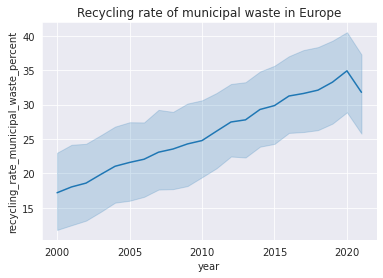

In [ ]:
#the line plot shows that we shall not use regression model, but polynomial or any other non-linear
sns.lineplot(x="year", y="recycling_rate_municipal_waste_percent", data = bycountry)
plt.title('Recycling rate of municipal waste in Europe')
plt.show

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # import r-squared function
from sklearn.metrics import mean_squared_error #calculate Mean Squared Error (MSE)

In [ ]:
#LINEAR regression 

# create a new dataframe for predictions
prediction_bycountrypivot = pd.DataFrame(columns=bycountrypivot.columns)

# create a dictionary to store R-squared values for each country
r_squared_dict = {}
mse_dict = {}
rmse_dict = {}

# iterate through each country and perform linear regression
for country in bycountrypivot.index.levels[0]:
    # select data for the current country
    data = bycountrypivot.loc[country].dropna(axis=1)
    
    # check if there is enough data for linear regression
    if data.shape[1] < 2:
        continue
        
    # create a linear regression model
    lr_model = LinearRegression()
    
    # fit the model to the data
    X = data.columns.values.reshape(-1, 1)
    y = data.values.reshape(-1, 1)
    lr_model.fit(X, y)
    
    # make predictions for the next 5 years
    X_pred = np.array([2022, 2023, 2024, 2025, 2026]).reshape(-1, 1)
    y_pred = lr_model.predict(X_pred).reshape(1, -1)
    
    # add the predictions to the prediction dataframe
    country_prediction = pd.DataFrame(y_pred, index=[country], columns=X_pred.flatten())
    prediction_bycountrypivot = pd.concat([prediction_bycountrypivot, country_prediction])
    
    # calculate R-squared value and store it in the dictionary
    y_pred_train = lr_model.predict(X)
    r_squared = r2_score(y, y_pred_train)
    r_squared_dict[country] = r_squared

    # calculate MSE and RMSE value and store it in the dictionary
    mse = mean_squared_error(y, y_pred_train)
    rmse = np.sqrt(mse)
    mse_dict[country] = mse
    rmse_dict[country] = rmse

# round the predictions to 2 decimal places
prediction_bycountrypivot = np.round(prediction_bycountrypivot, 2)
mse_dict = {k: round(v, 2) for k, v in mse_dict.items()}
rmse_dict = {k: round(v, 2) for k, v in rmse_dict.items()}

# display the predictions
prediction_bycountrypivot.head()


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.40,18.40,18.40,18.40,18.41
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,57.19,56.98,56.76,56.55,56.33
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,54.20,54.26,54.32,54.38,54.44
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,39.89,41.15,42.41,43.67,44.93


In [ ]:
# R-squared values for each country
# between 0.1 and 0.9 is good
# good results for Czechia, France, Hungary, Slovenia
# poor results Albania, Iceland, Montenegro, Norway, Spain, Sweden, Türkiye
for country, r_squared in r_squared_dict.items():
    print(f"R squared for {country}: {r_squared:.2f}")

R squared for Albania: 0.00
R squared for Austria: 0.28
R squared for Belgium: 0.05
R squared for Bosnia and Herzegovina: 1.00
R squared for Bulgaria: 0.57
R squared for Croatia: 0.31
R squared for Cyprus: 0.92
R squared for Czechia: 0.97
R squared for Denmark: 0.27
R squared for Estonia: 0.68
R squared for European Union - 27 countries (from 2020): 0.99
R squared for Finland: 0.52
R squared for France: 0.96
R squared for Germany: 0.89
R squared for Greece: 0.51
R squared for Hungary: 0.95
R squared for Iceland: 0.01
R squared for Ireland: 0.60
R squared for Italy: 0.85
R squared for Kosovo: 1.00
R squared for Latvia: 0.77
R squared for Lithuania: 0.89
R squared for Luxembourg: 0.89
R squared for Malta: 0.25
R squared for Montenegro: 0.00
R squared for Netherlands: 0.95
R squared for North Macedonia: 1.00
R squared for Norway: 0.00
R squared for Poland: 0.91
R squared for Portugal: 0.89
R squared for Romania: 0.68
R squared for Serbia: 0.08
R squared for Slovakia: 0.75
R squared for Sl

In [ ]:
#MSE results, the lower results the better
#provide an idea of how much error is present
#high degree of error for Bulgaria, Croatia, Slovakia,the United Kingdom
#very close to the actual values: European Union - 27 countries (from 2020)
for country, mse in mse_dict.items():
    print(f"MSE for {country}: {mse:.2f}")

MSE for Albania: 0.01
MSE for Austria: 4.75
MSE for Belgium: 2.63
MSE for Bosnia and Herzegovina: 0.00
MSE for Bulgaria: 48.95
MSE for Croatia: 47.91
MSE for Cyprus: 2.36
MSE for Czechia: 4.72
MSE for Denmark: 14.96
MSE for Estonia: 23.12
MSE for European Union - 27 countries (from 2020): 0.31
MSE for Finland: 6.53
MSE for France: 1.22
MSE for Germany: 2.84
MSE for Greece: 7.79
MSE for Hungary: 7.47
MSE for Iceland: 92.00
MSE for Ireland: 27.20
MSE for Italy: 25.34
MSE for Kosovo: 0.00
MSE for Latvia: 36.83
MSE for Lithuania: 40.40
MSE for Luxembourg: 2.29
MSE for Malta: 7.87
MSE for Montenegro: 0.06
MSE for Netherlands: 0.85
MSE for North Macedonia: 0.00
MSE for Norway: 10.35
MSE for Poland: 16.57
MSE for Portugal: 6.06
MSE for Romania: 11.16
MSE for Serbia: 8.98
MSE for Slovakia: 49.19
MSE for Slovenia: 26.05
MSE for Spain: 12.95
MSE for Sweden: 12.23
MSE for Switzerland: 0.96
MSE for Türkiye: 0.38
MSE for United Kingdom: 50.73


In [ ]:
#RMSE values: the RMSE of 0.09 means that the predictions are off by an average of 0,09
for country, rmse in rmse_dict.items():
    print(f"RMSE for {country}: {rmse:.2f}")

RMSE for Albania: 0.09
RMSE for Austria: 2.18
RMSE for Belgium: 1.62
RMSE for Bosnia and Herzegovina: 0.00
RMSE for Bulgaria: 7.00
RMSE for Croatia: 6.92
RMSE for Cyprus: 1.54
RMSE for Czechia: 2.17
RMSE for Denmark: 3.87
RMSE for Estonia: 4.81
RMSE for European Union - 27 countries (from 2020): 0.56
RMSE for Finland: 2.56
RMSE for France: 1.11
RMSE for Germany: 1.68
RMSE for Greece: 2.79
RMSE for Hungary: 2.73
RMSE for Iceland: 9.59
RMSE for Ireland: 5.22
RMSE for Italy: 5.03
RMSE for Kosovo: 0.00
RMSE for Latvia: 6.07
RMSE for Lithuania: 6.36
RMSE for Luxembourg: 1.51
RMSE for Malta: 2.81
RMSE for Montenegro: 0.24
RMSE for Netherlands: 0.92
RMSE for North Macedonia: 0.00
RMSE for Norway: 3.22
RMSE for Poland: 4.07
RMSE for Portugal: 2.46
RMSE for Romania: 3.34
RMSE for Serbia: 3.00
RMSE for Slovakia: 7.01
RMSE for Slovenia: 5.10
RMSE for Spain: 3.60
RMSE for Sweden: 3.50
RMSE for Switzerland: 0.98
RMSE for Türkiye: 0.61
RMSE for United Kingdom: 7.12


In [ ]:
#drop NAN-Values
prediction_bycountrypivot = prediction_bycountrypivot.dropna(axis=1, how='all')
prediction_bycountrypivot.head()

,2022,2023,2024,2025,2026
Albania,18.40,18.40,18.40,18.40,18.41
Austria,57.19,56.98,56.76,56.55,56.33
Belgium,54.20,54.26,54.32,54.38,54.44
Bosnia and Herzegovina,0.00,0.00,0.00,0.00,0.00
Bulgaria,39.89,41.15,42.41,43.67,44.93


In [ ]:
#renames the index (1st column) to "country_name".
prediction_bycountrypivot = prediction_bycountrypivot.rename_axis("country_name", axis='index')
prediction_bycountrypivot.head()

,2022,2023,2024,2025,2026
country_name,,,,,
Albania,18.40,18.40,18.40,18.40,18.41
Austria,57.19,56.98,56.76,56.55,56.33
Belgium,54.20,54.26,54.32,54.38,54.44
Bosnia and Herzegovina,0.00,0.00,0.00,0.00,0.00
Bulgaria,39.89,41.15,42.41,43.67,44.93


In [ ]:
#merge original dataframe with the prediction dataframe
left = bycountrypivot
right = prediction_bycountrypivot
merged_data=pd.merge(left, right, how ='outer', on ='country_name')
merged_data.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026
country_name,,,,,,,,,,,,,,,,,,,,,
Albania,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,18.4,...,18.4,18.4,18.4,18.1,18.70,18.40,18.40,18.40,18.40,18.41
Austria,63.4,64.3,62.5,64.2,57.4,58.3,59.2,60.2,63.2,61.9,...,57.8,57.7,58.2,62.3,59.66,57.19,56.98,56.76,56.55,56.33
Belgium,49.7,50.4,51.5,52.9,53.5,55.6,56.1,56.8,52.7,53.9,...,53.9,54.4,54.7,51.4,53.30,54.20,54.26,54.32,54.38,54.44
Bosnia and Herzegovina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Bulgaria,15.5,16.1,16.3,16.5,17.2,18.3,19.1,20.6,19.4,19.9,...,34.6,31.5,34.6,65.5,25.41,39.89,41.15,42.41,43.67,44.93
